In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("D:\\Ashvini\\Data Science\\Notes\\email spam.csv",encoding='cp1252')

In [4]:
df.head()

,category,message
0,ham,"""Go until jurong point, crazy.. Available only..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"""Nah I don't think he goes to usf, he lives ar..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5574 non-null   object
 1   message   5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.shape

(5574, 2)

In [7]:
df.isnull().sum()

category    0
message     0
dtype: int64

In [8]:
df=pd.get_dummies(data=df,columns=['category'],drop_first=True)
df.head()

,message,category_spam
0,"""Go until jurong point, crazy.. Available only...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"""Nah I don't think he goes to usf, he lives ar...",0


In [9]:
df['message']=df['message'].apply(lambda x:str(x))

In [10]:
df['message'][0]

'"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."'

In [11]:
x=df['message']
x.head()

0    "Go until jurong point, crazy.. Available only...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    "Nah I don't think he goes to usf, he lives ar...
Name: message, dtype: object

In [12]:
y=df['category_spam']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: category_spam, dtype: uint8

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [15]:
X_train.shape

(4459,)

In [16]:
X_test.shape

(1115,)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
vectorizer=CountVectorizer()

In [19]:
X_train_vect=vectorizer.fit_transform(X_train)
X_train_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
X_train_vect.toarray().shape

(4459, 7725)

In [21]:
X_test_vect=vectorizer.transform(X_test)
X_test_vect.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
X_test_vect.toarray().shape

(1115, 7725)

In [23]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()

In [24]:
model.fit(X_train_vect,y_train)

BernoulliNB()

In [25]:
model.score(X_test_vect,y_test)

0.97847533632287

In [26]:
emails=['hey john,can we meet today?',
        'hurry up its free entry join eary call 6789 and get 50% off',
        'get free hoodie by calling 4567 t&c apply']

In [27]:
model.predict(vectorizer.transform(emails))

array([0, 0, 0], dtype=uint8)

In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
mb=MultinomialNB()

In [30]:
mb.fit(X_train_vect,y_train)

MultinomialNB()

In [31]:
mb.score(X_test_vect,y_test)

0.9838565022421525

In [32]:
mb.predict(vectorizer.transform(emails))

array([0, 1, 1], dtype=uint8)

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
clf=Pipeline([('vectorizer',CountVectorizer()),('mb',MultinomialNB())])

In [35]:
clf

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mb', MultinomialNB())])

In [36]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('mb', MultinomialNB())])

In [37]:
X_train.head()

1350    "FREE2DAY sexy St George's Day pic of Jordan!T...
5544             Armand says get your ass over to epsilon
1168              Lol now I'm after that hot air balloon!
5551    "You know, wot people wear. T shirts, jumpers,...
5320    "Good morning, my Love ... I go to sleep now a...
Name: message, dtype: object

In [38]:
clf.score(X_test,y_test)

0.9838565022421525

In [39]:
y_pred=clf.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix 

In [41]:
cm=confusion_matrix (y_test,y_pred)

In [42]:
import seaborn as sns

<AxesSubplot:>

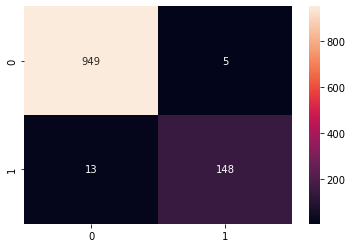

In [43]:
sns.heatmap(cm,annot=True,fmt='d')